## VECTORS AND MATRICES

In [ ]:


# row vector
arr=[10,20,30]

# column vector
arr=[10; 20; 30]

# matrix 3x3
mtrx=[1 2 3; 4 5 6; 7 8 9]
# access 1st row second col:  mtrx[1,2]

# transpose of matrix
mtrx'

In [14]:
# row vector
arr=[10,20,30]

3-element Vector{Int64}:
 10
 20
 30

In [7]:
# column vector
arr=[10; 20; 30]

3-element Vector{Int64}:
 10
 20
 30

In [10]:
# matrix 3x3
mtrx=[1 2 3; 4 5 6; 7 8 9]
# access 1st row second col:  mtrx[1,2]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [11]:
# transpose of matrix
mtrx'

3×3 adjoint(::Matrix{Int64}) with eltype Int64:
 1  4  7
 2  5  8
 3  6  9

In [13]:
# inverse of matrix
m=[1 2; 3 4]
inv(m)

2×2 Matrix{Float64}:
 -2.0   1.0
  1.5  -0.5

## DICTIONARIES

In [15]:
# create a dictionary
D = Dict("name"=>"some course","year"=>2018)

Dict{String, Any} with 2 entries:
  "name" => "some course"
  "year" => 2018

In [16]:
# access elem using key
D["name"]

"some course"

In [17]:
# count elems in dict
D.count

2

## STRINGS

In [20]:
text="some string"
println(text[1])
println(length(text))

s
11


In [22]:
# extract substring from index 2 to 5
text[2:6]

"ome s"

In [24]:
# strings are immutable
text[1]="d"

LoadError: MethodError: no method matching setindex!(::String, ::String, ::Int64)

## PREDICTION PROBLEM

In [58]:
# imports
using DataFrames
using CSV
using Statistics
using StatsBase
using Plots
using StatsPlots

In [28]:
train=CSV.read("train_ctrUa4K.csv", DataFrame)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome
,String15,String7?,String3?,String3?,String15,String3?,Int64
1,LP001002,Male,No,0,Graduate,No,5849
2,LP001003,Male,Yes,1,Graduate,No,4583
3,LP001005,Male,Yes,0,Graduate,Yes,3000
4,LP001006,Male,Yes,0,Not Graduate,No,2583
5,LP001008,Male,No,0,Graduate,No,6000
6,LP001011,Male,Yes,2,Graduate,Yes,5417
7,LP001013,Male,Yes,0,Not Graduate,No,2333
8,LP001014,Male,Yes,3+,Graduate,No,3036
9,LP001018,Male,Yes,2,Graduate,No,4006


In [29]:
size(train)

(614, 13)

In [30]:
describe(train)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,Loan_ID,,LP001002,,LP002990,0,String15
2,Gender,,Female,,Male,13,"Union{Missing, String7}"
3,Married,,No,,Yes,3,"Union{Missing, String3}"
4,Dependents,,0,,3+,15,"Union{Missing, String3}"
5,Education,,Graduate,,Not Graduate,0,String15
6,Self_Employed,,No,,Yes,32,"Union{Missing, String3}"
7,ApplicantIncome,5403.46,150,3812.5,81000,0,Int64
8,CoapplicantIncome,1621.25,0.0,1188.5,41667.0,0,Float64
9,LoanAmount,146.412,9,128.0,700,22,"Union{Missing, Int64}"


In [31]:
names(train)

13-element Vector{String}:
 "Loan_ID"
 "Gender"
 "Married"
 "Dependents"
 "Education"
 "Self_Employed"
 "ApplicantIncome"
 "CoapplicantIncome"
 "LoanAmount"
 "Loan_Amount_Term"
 "Credit_History"
 "Property_Area"
 "Loan_Status"

In [33]:
first(train,10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome
,String15,String7?,String3?,String3?,String15,String3?,Int64
1,LP001002,Male,No,0,Graduate,No,5849
2,LP001003,Male,Yes,1,Graduate,No,4583
3,LP001005,Male,Yes,0,Graduate,Yes,3000
4,LP001006,Male,Yes,0,Not Graduate,No,2583
5,LP001008,Male,No,0,Graduate,No,6000
6,LP001011,Male,Yes,2,Graduate,Yes,5417
7,LP001013,Male,Yes,0,Not Graduate,No,2333
8,LP001014,Male,Yes,3+,Graduate,No,3036
9,LP001018,Male,Yes,2,Graduate,No,4006


In [43]:
describe(train[!,[:LoanAmount]])

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,Union
1,LoanAmount,146.412,9,128.0,700,22,"Union{Missing, Int64}"


In [56]:
countmap(train.Property_Area)


Dict{String15, Int64} with 3 entries:
  "Urban"     => 202
  "Rural"     => 179
  "Semiurban" => 233

In [67]:
train=dropmissing(train,:)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome
,String15,String7,String3,String3,String15,String3,Int64
1,LP001003,Male,Yes,1,Graduate,No,4583
2,LP001005,Male,Yes,0,Graduate,Yes,3000
3,LP001006,Male,Yes,0,Not Graduate,No,2583
4,LP001008,Male,No,0,Graduate,No,6000
5,LP001011,Male,Yes,2,Graduate,Yes,5417
6,LP001013,Male,Yes,0,Not Graduate,No,2333
7,LP001014,Male,Yes,3+,Graduate,No,3036
8,LP001018,Male,Yes,2,Graduate,No,4006
9,LP001020,Male,Yes,1,Graduate,No,12841


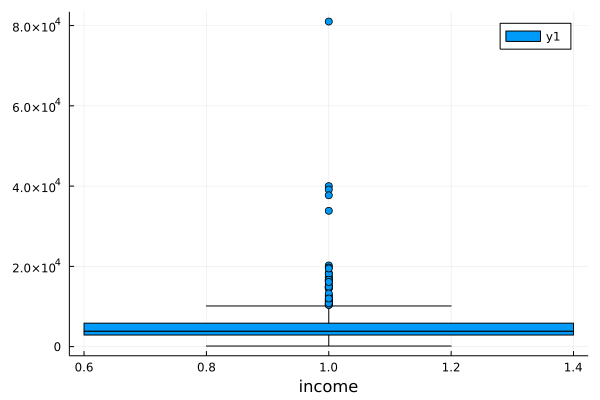

In [68]:
Plots.boxplot(train.ApplicantIncome, xlabel="income")

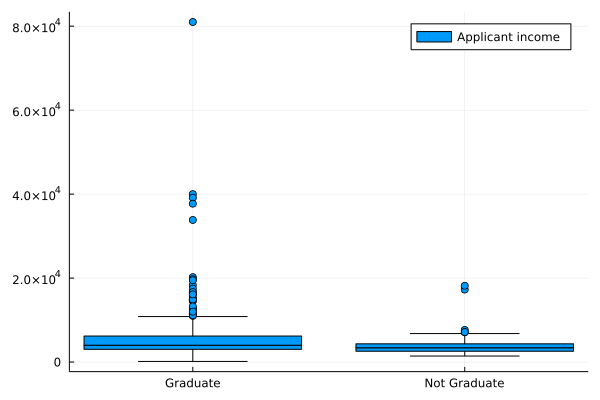

In [69]:
Plots.boxplot(train.Education,train.ApplicantIncome,labels="Applicant income")

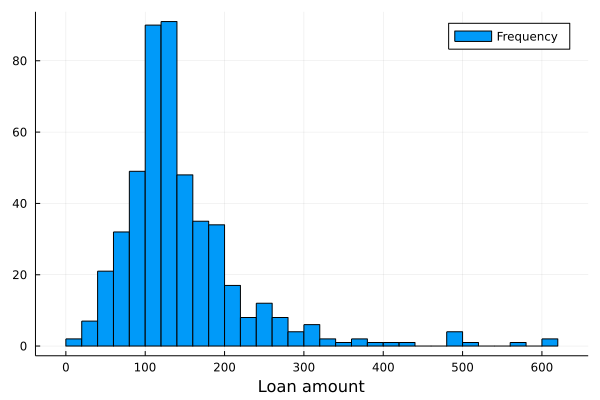

In [77]:
Plots.histogram(train.LoanAmount,bins=50,xlabel="Loan amount",labels="Frequency")

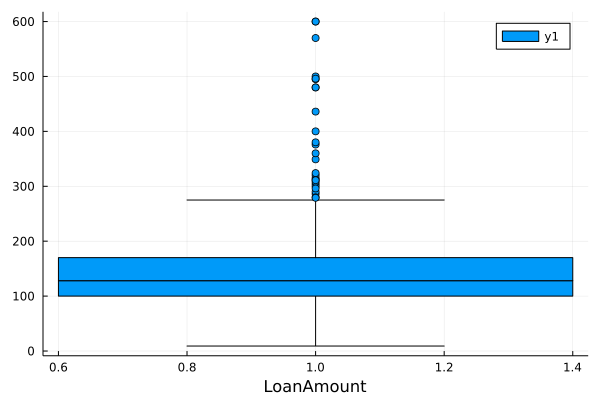

In [78]:

Plots.boxplot(train.LoanAmount, xlabel="LoanAmount")

In [79]:

plotly()
Plots.histogram(train.ApplicantIncome,bins=50,xlabel="ApplicantIncome",labels="Frequency")

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /home/john/.julia/packages/Plots/NQpB8/src/backends.jl:432
